# Analysis for Group Project

### A single dataset is used for all the crop prices 

this dataset displays a time series of prices for different Canadian agricultural products over time.

[Farm product prices, crops and livestock](https://open.canada.ca/data/en/dataset/d5614095-e77a-4cb4-a5e6-9f8bff067c9f)


In [151]:
import datetime as dt

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm


# here is a util we'll use to plot graphs of prices
def _plot_time_series_from_df(df, x, y, z, product_name):
    sns.lineplot(data=df, x=x, y=y, hue=z)
    plt.title(f"Time Series of Prices for {product_name}")
    plt.xlabel("Date")
    plt.ylabel(df["UOM"].iloc[0])


In [152]:
# CSV was downloaded and added to the git repo
# Read in the prices CSV
prices_df = pd.read_csv("./data/32100077.csv")
prices_df.head()

,REF_DATE,GEO,DGUID,Farm products,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1980-01,Manitoba,2016A000246,"Canadian Wheat Board, wheat including payments",Dollars per metric tonne,117,units,0,v31212166,7.4,170.49,NaN,NaN,t,2
1,1980-01,Manitoba,2016A000246,"Canadian Wheat Board, wheat excluding payments",Dollars per metric tonne,117,units,0,v31212167,7.5,133.74,NaN,NaN,t,2
2,1980-01,Manitoba,2016A000246,"Canadian Wheat Board, durum including payments",Dollars per metric tonne,117,units,0,v31212168,7.6,178.79,NaN,NaN,t,2
3,1980-01,Manitoba,2016A000246,"Canadian Wheat Board, durum excluding payments",Dollars per metric tonne,117,units,0,v31212169,7.7,142.90,NaN,NaN,t,2
4,1980-01,Saskatchewan,2016A000247,"Canadian Wheat Board, wheat including payments",Dollars per metric tonne,117,units,0,v31212202,8.4,175.79,NaN,NaN,t,2


In [153]:
# DATA PREP

# if you look at the DF, there is a date column in the format of YYYY-MM
## let's turn this into a proper datetime object 
prices_df["REF_DATE"] = pd.to_datetime(prices_df["REF_DATE"].apply(lambda x: dt.datetime.strptime(x, "%Y-%m")))
# let's also add an integer column for Year
## this column will be useful for grouping in our analysis
prices_df["YEAR"] = prices_df["REF_DATE"].apply(lambda x: x.year)
## convert UOM to category data type
prices_df["UOM"] = prices_df["UOM"].astype("category")
## convert SCALAR_FACTOR to category data type
prices_df["SCALAR_FACTOR"] = prices_df["SCALAR_FACTOR"].astype("category")
prices_df.head()


,REF_DATE,GEO,DGUID,Farm products,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS,YEAR
0,1980-01-01,Manitoba,2016A000246,"Canadian Wheat Board, wheat including payments",Dollars per metric tonne,117,units,0,v31212166,7.4,170.49,NaN,NaN,t,2,1980
1,1980-01-01,Manitoba,2016A000246,"Canadian Wheat Board, wheat excluding payments",Dollars per metric tonne,117,units,0,v31212167,7.5,133.74,NaN,NaN,t,2,1980
2,1980-01-01,Manitoba,2016A000246,"Canadian Wheat Board, durum including payments",Dollars per metric tonne,117,units,0,v31212168,7.6,178.79,NaN,NaN,t,2,1980
3,1980-01-01,Manitoba,2016A000246,"Canadian Wheat Board, durum excluding payments",Dollars per metric tonne,117,units,0,v31212169,7.7,142.90,NaN,NaN,t,2,1980
4,1980-01-01,Saskatchewan,2016A000247,"Canadian Wheat Board, wheat including payments",Dollars per metric tonne,117,units,0,v31212202,8.4,175.79,NaN,NaN,t,2,1980


In [154]:
# let's look at the shape of the data frames
print(prices_df.shape)

(109951, 16)


In [155]:
# Just so that we have a comprehensive list of the different products in this dataset, let's print out a unique lit of the `Farm products` column 

products = pd.Series(prices_df["Farm products"].sort_values().unique(), name="products")
products

0                                      Barley [1151141]
1                    Barley for animal feed [115114111]
2     Barley for malt and other human consumption [1...
3                         Calves for feeding [11111122]
4                      Calves for slaughter [111111211]
5       Canadian Wheat Board, barley excluding payments
6       Canadian Wheat Board, barley including payments
7        Canadian Wheat Board, durum excluding payments
8        Canadian Wheat Board, durum including payments
9     Canadian Wheat Board, selected barley excludin...
10    Canadian Wheat Board, selected barley includin...
11       Canadian Wheat Board, wheat excluding payments
12       Canadian Wheat Board, wheat including payments
13                              Canary seeds [11511555]
14                 Canola (including rapeseed) [113111]
15                        Cattle for feeding [11111112]
16                      Cattle for slaughter [11111111]
17                         Chickens for meat [11

# Part 1: Chickens


In [156]:
# Prices

# DATA PREP

# define a `products` variable that will be used to select the rows of interest
product = "Chickens for meat [11113131]"

# create a boolean mask that will select chickens for meat and rows where the `VALUE` column is not null 
mask = (prices_df["Farm products"] == product) & (prices_df["VALUE"].notnull())
chicken_prices_df = prices_df[mask]
chicken_prices_df.head()

,REF_DATE,GEO,DGUID,Farm products,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS,YEAR
1156,1985-01-01,Newfoundland and Labrador,2016A000210,Chickens for meat [11113131],Dollars per kilogram,113,units,0,v31212056,1.38,1.85,NaN,NaN,NaN,2,1985
1166,1985-01-01,Prince Edward Island,2016A000211,Chickens for meat [11113131],Dollars per kilogram,113,units,0,v31212075,2.38,1.54,NaN,NaN,NaN,2,1985
1176,1985-01-01,Nova Scotia,2016A000212,Chickens for meat [11113131],Dollars per kilogram,113,units,0,v31212093,3.38,1.54,NaN,NaN,NaN,2,1985
1187,1985-01-01,New Brunswick,2016A000213,Chickens for meat [11113131],Dollars per kilogram,113,units,0,v31212112,4.38,1.59,NaN,NaN,NaN,2,1985
1199,1985-01-01,Quebec,2016A000224,Chickens for meat [11113131],Dollars per kilogram,113,units,0,v31212136,5.38,1.47,NaN,NaN,NaN,2,1985


In [157]:
# we need to make sure we are only dealing with a single category for UoM and Scale
## sometimes these datasets will have the same data in a subsequent row for a different scale. e.g., `Dollars per kg` vs. `dollars per pound`.
assert chicken_prices_df["Farm products"].unique().__len__() == 1
assert chicken_prices_df["UOM"].unique().__len__() == 1
assert chicken_prices_df["SCALAR_FACTOR"].unique().__len__() == 1

# if there is no exception raised, we are good to go!  

When we look at the historical prices, Newfoundland looks very different from the other provinces. It is clear that NL is distinct from the rest of the country which is comparatively in lock step. 

That being considered, it would make sense to exclude this province from our analysis.

Furthermore, in order to work with the data, it will be easier to have all the price data aggregated into a single response. 

The graphs below show the three states of the data:

1. The raw price data from all the provinces
2. The raw price data from all the provinces except for NL which was excluded
3. An aggregated price curve - the annual mean for all provinces, excluding NL


<Axes: title={'center': 'Aggregated Price of Chicken Meat in Canada (1985-2023)'}, xlabel='Date', ylabel='Dollars per kilogram'>

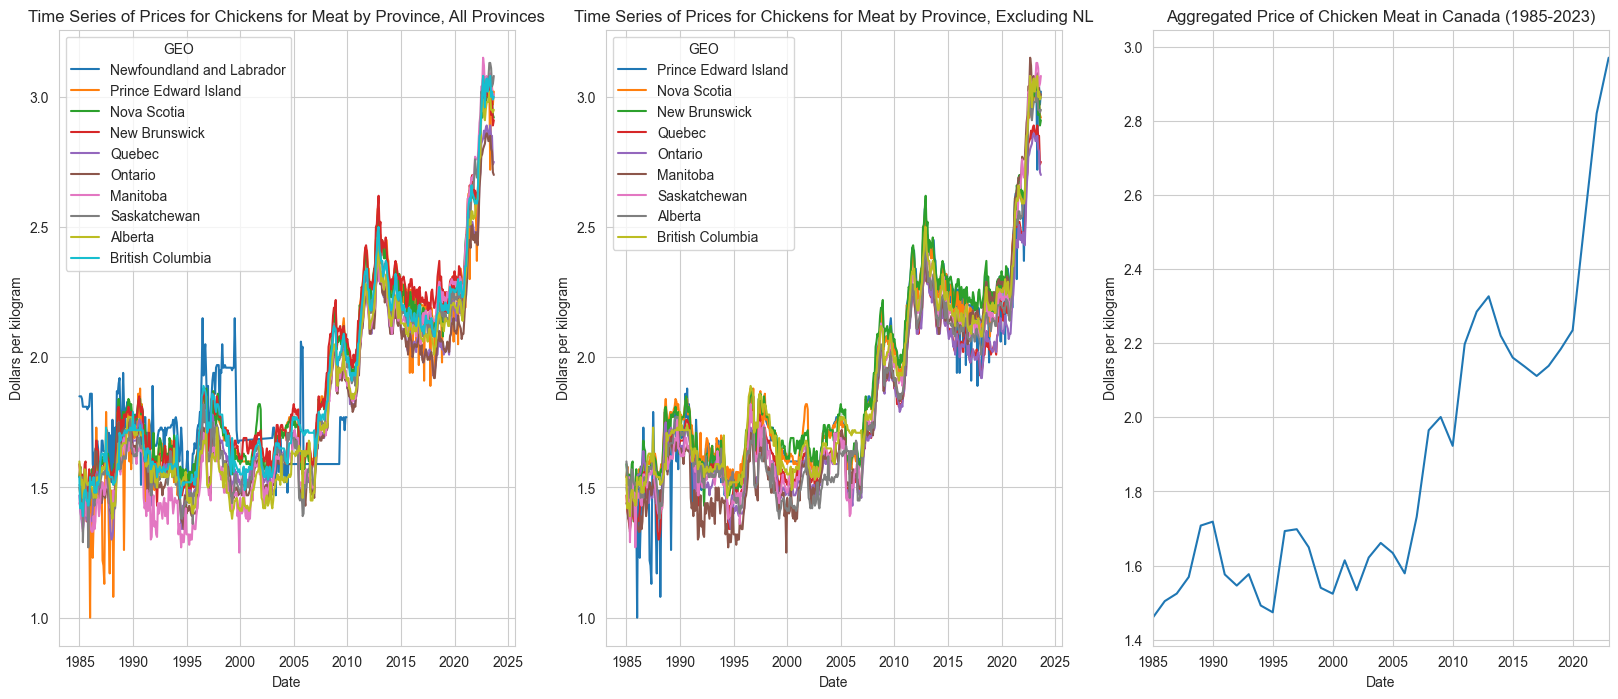

In [158]:
# define the fig size
plt.figure(figsize=(20, 8))

# plot with all provinces
plt.subplot(1, 3, 1)
_plot_time_series_from_df(chicken_prices_df, "REF_DATE", "VALUE", "GEO", "Chickens for Meat by Province, All Provinces")
mask = (chicken_prices_df["GEO"] != "Newfoundland and Labrador")
chicken_prices_df = chicken_prices_df[mask]

# plot with all provinces, excluding newfoundland
plt.subplot(1, 3, 2)
_plot_time_series_from_df(chicken_prices_df, "REF_DATE", "VALUE", "GEO", "Chickens for Meat by Province, Excluding NL")

# plot with all provinces, combined into a single variable
plt.subplot(1, 3, 3)
chicken_prices_df.groupby("YEAR")["VALUE"].mean()

# convert to time series - this will be used later on for the final analysis
ser_chicken_prices = pd.Series(
    data=chicken_prices_df.groupby("YEAR")["VALUE"].mean(numeric_only=True).values,
    index=chicken_prices_df.groupby("YEAR").mean(numeric_only=True).index.to_series().apply(lambda x: dt.datetime.strptime(str(x), "%Y")),
    name="prices"
)
# Jeush, please take note of the transformation needed to create the index on the time series

# labels for plot
labels = {
    "title": f"Aggregated Price of Chicken Meat in Canada ({ser_chicken_prices.index.min().year}-{ser_chicken_prices.index.max().year})",
    "xlabel": "Date",
    "ylabel": "Dollars per kilogram",
}
ser_chicken_prices.plot(**labels)



Now we need some production data. This dataset seems to be pretty good: 
[Selected livestock and poultry, Census of Agriculture historical data](https://open.canada.ca/data/en/dataset/fa6077cb-b908-42e6-963e-5f09d32c2eea)

In [159]:
# from https://open.canada.ca/data/en/dataset/fa6077cb-b908-42e6-963e-5f09d32c2eea

# CSV was downloaded and added to the git repo
# This will be the response variable
production_df = pd.read_csv("./data/32100155.csv")

# let's take a look
production_df


,REF_DATE,GEO,DGUID,Selected livestock,Unit of measure,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1921,Canada,2016A000011124,Total cattle,Number of animals,Number,223,units,0,v62727290,1.1.2,8369489.0,NaN,NaN,NaN,0
1,1921,Canada,2016A000011124,Total cattle,Average number,Number,223,units,0,v62727291,1.1.3,NaN,..,NaN,NaN,0
2,1921,Canada,2016A000011124,Total pigs,Number of farms reporting,Number,223,units,0,v62727310,1.8.1,452935.0,NaN,NaN,NaN,0
3,1921,Canada,2016A000011124,Total pigs,Number of animals,Number,223,units,0,v62727311,1.8.2,3324291.0,NaN,NaN,NaN,0
4,1921,Canada,2016A000011124,Total pigs,Average number,Number,223,units,0,v62727312,1.8.3,7.0,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9210,2021,British Columbia,2016A000259,Total hens and chickens,Number of animals,Number,223,units,0,v62728142,11.25.2,22869453.0,NaN,NaN,NaN,0
9211,2021,British Columbia,2016A000259,Total hens and chickens,Average number,Number,223,units,0,v62728143,11.25.3,5366.0,NaN,NaN,NaN,0
9212,2021,British Columbia,2016A000259,Turkeys,Number of farms reporting,Number,223,units,0,v62728144,11.26.1,376.0,NaN,NaN,NaN,0
9213,2021,British Columbia,2016A000259,Turkeys,Number of animals,Number,223,units,0,v62728145,11.26.2,733784.0,NaN,NaN,NaN,0


In [160]:
# DATA PREP

# convert the year to a datetime obj
production_df["REF_DATE"] = pd.to_datetime(production_df["REF_DATE"].apply(lambda x: dt.datetime.strptime(str(x), "%Y")))

# again let's create a boolean mask to select the rows of interest
mask = (
        (production_df["GEO"] == "Canada") &  # only select reporting for Canada as a whole
        (production_df["VALUE"].notnull()) & # only rows that have production values
        (production_df["Selected livestock"] == "Total hens and chickens") & # only the hens and chickens
        (production_df["Unit of measure"] == "Number of animals")  # only get the number of animals
)
production_df = production_df[mask]
production_df.head()



,REF_DATE,GEO,DGUID,Selected livestock,Unit of measure,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
11,1921-01-01,Canada,2016A000011124,Total hens and chickens,Number of animals,Number,223,units,0,v62727362,1.25.2,41125091.0,NaN,NaN,NaN,0
271,1931-01-01,Canada,2016A000011124,Total hens and chickens,Number of animals,Number,223,units,0,v62727362,1.25.2,61277229.0,NaN,NaN,NaN,0
532,1941-01-01,Canada,2016A000011124,Total hens and chickens,Number of animals,Number,223,units,0,v62727362,1.25.2,58994493.0,NaN,NaN,NaN,0
813,1951-01-01,Canada,2016A000011124,Total hens and chickens,Number of animals,Number,223,units,0,v62727362,1.25.2,64615025.0,NaN,NaN,NaN,0
978,1956-01-01,Canada,2016A000011124,Total hens and chickens,Number of animals,Number,223,units,0,v62727362,1.25.2,67641098.0,NaN,NaN,NaN,0


<Axes: title={'center': 'Number of Poultry Raised in Canada (1921-2021)'}, xlabel='Date', ylabel='Number of animals, in millions'>

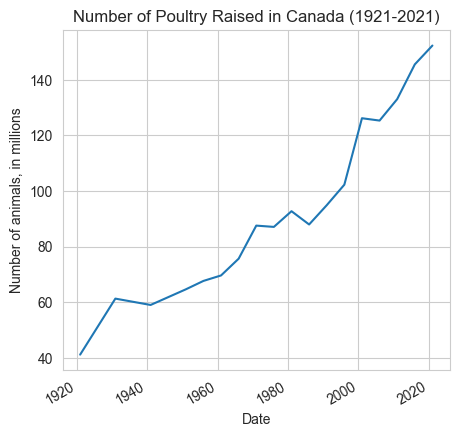

In [161]:
# Now let's graph the time series
ser_chicken_production = pd.Series(data=production_df["VALUE"].values, index=production_df["REF_DATE"], name="production")

# the number of animals are shown in units but it would make more sense to divide by 1 million 
ser_chicken_production = ser_chicken_production / 1e6

plt.figure(figsize=(5, 5))
# chicken count
plt.subplot(1, 1, 1)
labels = dict(
    xlabel="Date",
    ylabel="Number of animals, in millions",
    title=f"Number of Poultry Raised in Canada ({ser_chicken_production.index.min().year}-{ser_chicken_production.index.max().year})"
)
ser_chicken_production.plot(**labels)


Now that we have a time series for prices and production, let's merge them into a single dataframe.


In [162]:
final_df = pd.DataFrame(data={"prices": ser_chicken_prices}).join(ser_chicken_production)
final_df['Eins'] = np.ones((len(final_df),))
final_df


,prices,production,Eins
YEAR,,,
1985-01-01,1.459167,NaN,1.0
1986-01-01,1.503981,87.942244,1.0
1987-01-01,1.524352,NaN,1.0
1988-01-01,1.569167,NaN,1.0
1989-01-01,1.707870,NaN,1.0
1990-01-01,1.718426,NaN,1.0
1991-01-01,1.576019,94.872875,1.0
1992-01-01,1.545926,NaN,1.0
1993-01-01,1.576667,NaN,1.0


# This is a good problem to talk about in the report!

when matching up the time series, there is only a small portion of overlap and thus we end up with a fairly small sample size (n=8).

In [163]:
# PREP

final_df = final_df.dropna()
final_df


,prices,production,Eins
YEAR,,,
1986-01-01,1.503981,87.942244,1.0
1991-01-01,1.576019,94.872875,1.0
1996-01-01,1.693056,102.255149,1.0
2001-01-01,1.614062,126.159529,1.0
2006-01-01,1.578889,125.314793,1.0
2011-01-01,2.197407,133.025153,1.0
2016-01-01,2.136944,145.519566,1.0
2021-01-01,2.529907,152.299258,1.0


Text(0.5, 28.999999999999986, 'Dollars per kilogram of meat')

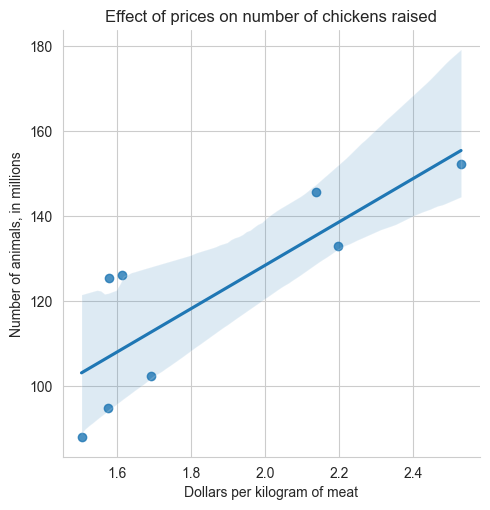

In [164]:

# let's use a linear regression to explore the relationship between prices and production

# a scatter plot and the OLS regression line plotted
sns.lmplot(data=final_df, x="prices", y="production")
plt.title("Effect of prices on number of chickens raised")
plt.ylabel("Number of animals, in millions")
plt.xlabel("Dollars per kilogram of meat")

In [165]:
# finally let's look at the results from the regression

Y = final_df["production"]
X = final_df[['prices', 'Eins']]
results = sm.OLS(Y, X).fit()
results.summary()



C:\Users\fishmand\Projects\watspeed_root\venv0\lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             production   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     12.47
Date:                Sun, 10 Dec 2023   Prob (F-statistic):             0.0124
Time:                        16:19:44   Log-Likelihood:                -31.609
No. Observations:                   8   AIC:                             67.22
Df Residuals:                       6   BIC:                             67.38
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
prices        50.9459     14.428      3.531      0.012      15.642      86.250
Eins          26.4810     27.235      0.972      0.368     -40.161      93.123
==============================================================================
Omnibus:                        2.302   Durbin-Watson:                   1.404
Prob(Omnibus):                  0.316   Jarque-Bera (JB):                0.929
Skew:                           0.382   Prob(JB):                        0.629
Kurtosis:                       1.516   Cond. No.                         12.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### linear regression results:

The result of this analysis supports the rejection of the null hypothesis, which was there is no effect of prices on production

the model's intercept was found to be `26.4810` and the coefficient for the `prices` variable is `50.9459`

`Production  =  26.4810 + 50.9459 x Price` 

The F-staticic for this model was `12.47` and the changes of observing this statistic under a normal distribution is less than 0.05 %. Therefore, with a p-value set to 0.05, we would reject the null hypothesis. 

The R<sup>2</sup> is `0.675` which means approximately 67% of the variance of the data can be accounted for by this model.   



